# Analysis of Vehicles dataset (Beginner's Analysis)

1.2 Million Used Car Listings
1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model

link: https://www.kaggle.com/jpayne/852k-used-car-listings

In [1]:
import sys
print(sys.executable)

E:\ProgramData\Anaconda3\python.exe


## 1. First we import necessary Libaries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## 2.Reading and Exploring the Data

### Load Vehicles Data

In [3]:
vehicles = pd.read_csv("datasets/true_car_listings.csv")
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [4]:
vehicles.sample(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
566085,27808,2013,46351,Fairfield,OH,JTHCE1BL4D5018343,Lexus,GS
743907,21999,2013,48521,Saint Cloud,MN,4S4BRCSC6D3319331,Subaru,Outback2.5i
643186,10973,2013,47293,Martinez,GA,1N4AB7AP3DN901395,Nissan,SentraSV
570460,14240,2007,139209,Rogers,AR,JTJBT20X070135124,Lexus,GX
407002,19999,2015,29808,Woods Cross,UT,5J6RM4H90FL045124,Honda,CR-VTouring


In [5]:
vehicles.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [6]:
vehicles.shape

(852122, 8)

## 3.Cleaning of data

In [7]:
vehicles.isnull().any()

Price      False
Year       False
Mileage    False
City       False
State      False
Vin        False
Make       False
Model      False
dtype: bool

In [8]:
vehicles.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [9]:
# # lets drop null rows
# vehicles=vehicles.dropna()

## 4.Data Analysis

In [10]:
vehicle_top_price =  vehicles.loc[(vehicles.Year>=1970) & (vehicles.Price>=1000) & (vehicles.Price<=50000)].sort_values(by=['Price'], ascending=False)
vehicle_top_price.head(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
374958,50000,2017,19874,Grand Rapids,MI,1GKS2BKC3HR112972,GMC,Yukon4WD
341620,50000,2015,22720,Ocala,FL,1FT8W3BT1FEB10142,Ford,Super
722311,50000,2016,61675,Heber Springs,AR,3C6UR5GL8GG114040,Ram,25004WD
376552,50000,2015,27115,Golden Valley,MN,1GKS2HKC4FR125729,GMC,Yukon
479874,50000,2015,39728,Miami,FL,SAJWA4GB0FLB55214,Jaguar,XKConvertible


In [11]:
vehicle_top_price.shape

(830391, 8)

In [12]:
vehicle_top_price.describe()

,Price,Year,Mileage
count,830391.000000,830391.000000,8.303910e+05
mean,20206.994616,2013.234108,5.336048e+04
std,9733.867150,3.424718,4.209413e+04
min,1500.000000,1997.000000,5.000000e+00
25%,12995.000000,2012.000000,2.456500e+04
50%,18000.000000,2014.000000,4.097200e+04
75%,26000.000000,2016.000000,7.338100e+04
max,50000.000000,2018.000000,2.856196e+06


## 5. Data Visualization
https://clrife.github.io/

In [13]:
import seaborn as sns

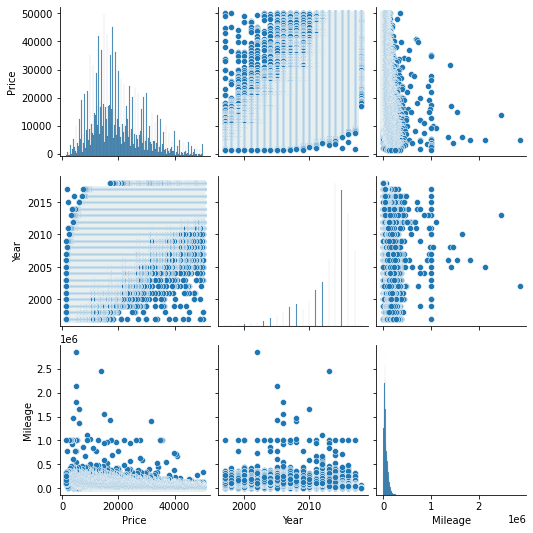

In [14]:
sns.pairplot(vehicle_top_price)

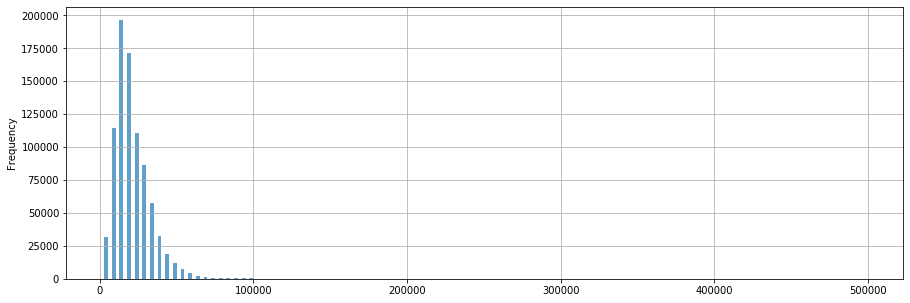

In [36]:
# https://stackoverflow.com/a/31047434
vehicles['Price'].plot.hist(figsize=(15,5), bins=100, alpha=0.7, rwidth=0.5, grid=True)

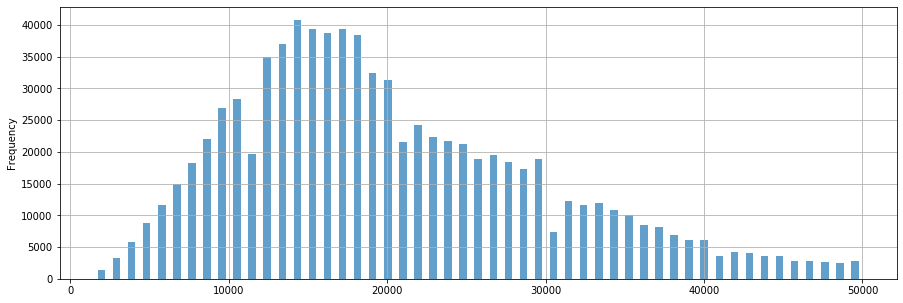

In [38]:
vehicle_top_price['Price'].plot.hist(figsize=(15,5), bins=51, alpha=0.7, rwidth=0.5, grid=True)

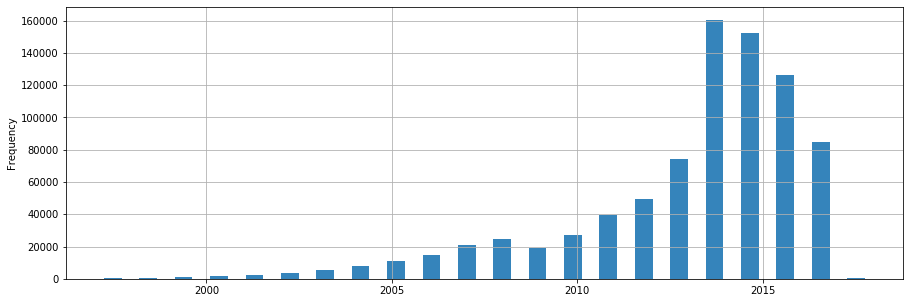

In [18]:
vehicle_top_price['Year'].plot.hist(figsize=(15,5), bins=22, alpha=0.9, rwidth=0.5, grid=True)

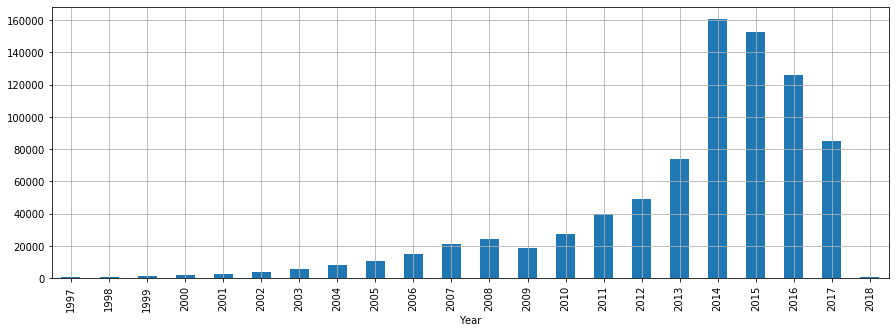

In [21]:
# https://stackoverflow.com/a/48238312
# df.groupby('year').case_status.value_counts().unstack(0).plot.barh()
vehicle_top_price.groupby('Year').Price.count().plot.bar(figsize=(15,5), grid=True)

In [40]:
df = vehicle_top_price.groupby('year')

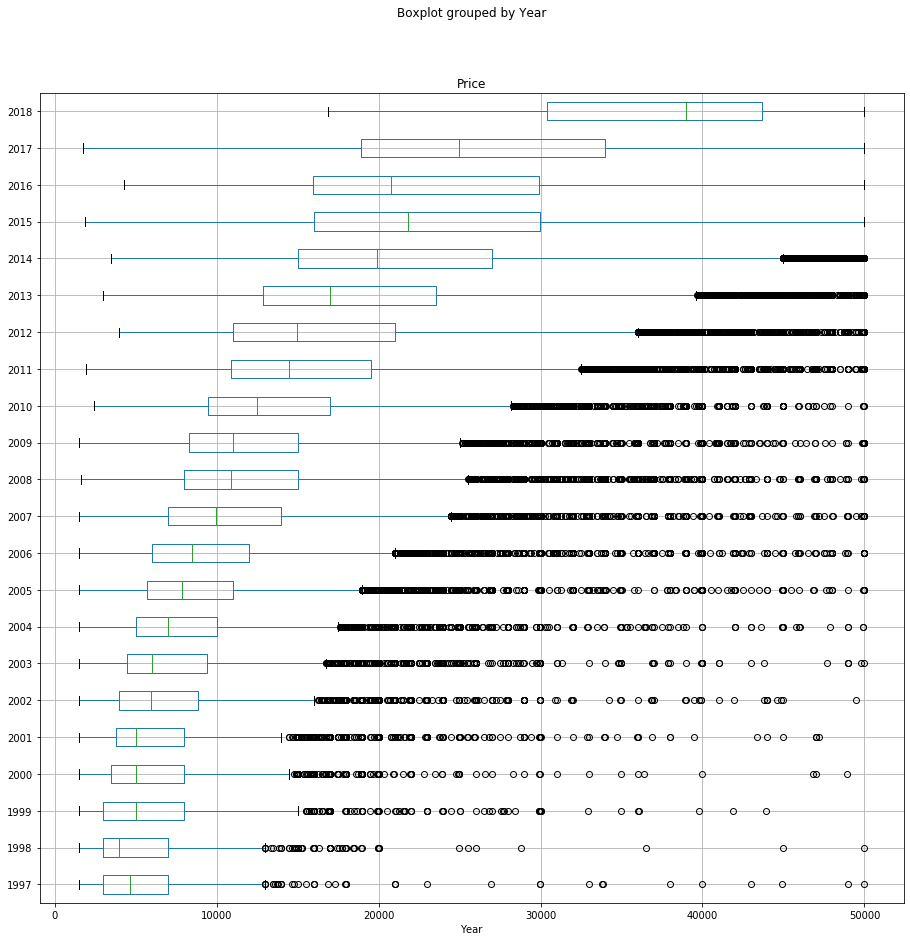

In [23]:
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
# df = pd.DataFrame(vehicle_top_price, columns=['year', 'price'], index=vehicle_top_price.index)
# grouped = df.groupby('year')
# # grouped.first()
# grouped.boxplot(vert=False, column='price', figsize=(15,15), grid=True, subplots=False)

vehicle_top_price.boxplot(column = 'Price', by = 'Year', vert=False, figsize=(15,15), grid=True)

In [22]:
# vehicle_top_price.boxplot(column = 'price', by = ['year', 'manufacturer'], vert=False, figsize=(15,50), grid=True)

## 6.1 Cleaning of data

In [46]:
vehicle_top_price = vehicles.loc[(vehicles.Year>=1970) & (vehicles.Price>=1000) & (vehicles.Price<=50000)].loc[:, ['Price', 'Mileage', 'Year']]

In [47]:
vehicle_top_price.sample(5)

,Price,Mileage,Year
758523,15625,31589,2014
508975,34995,10134,2014
31650,23700,34973,2013
230797,26988,38462,2016
392931,18900,32979,2014


In [48]:
vehicle_top_price.isnull().any()

Price      False
Mileage    False
Year       False
dtype: bool

In [49]:
vehicle_top_price.isnull().sum()

Price      0
Mileage    0
Year       0
dtype: int64

In [50]:
vehicle_top_price=vehicle_top_price.dropna()

In [51]:
vehicle_top_price.shape

(830391, 3)

In [52]:
vehicle_top_price['Price'] = vehicle_top_price['Price'] / vehicle_top_price['Price'].mean()

In [53]:
vehicle_top_price.sample(5)

,Price,Mileage,Year
442587,0.989311,1856,2016
518401,1.236750,48537,2009
41660,1.820013,10601,2017
657101,0.905479,34749,2014
192208,0.841045,49000,2015


## 6.2 Regression 

In [31]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [32]:
#added some parameters
# https://stackoverflow.com/a/45116022
kf5 = KFold(n_splits = 5, shuffle = True, random_state = 2)

In [54]:
scores, RMSE = [], []
for train_index, test_index in kf5.split(vehicle_top_price):
#     train_x = np.array(vehicle_top_price.iloc[train_index]['odometer']).reshape(-1, 1)
#     test_x  = np.array(vehicle_top_price.iloc[test_index]['odometer']]).reshape(-1, 1)
    
    train_x = np.array(vehicle_top_price.iloc[train_index][['Mileage', 'Year']])
    test_x  = np.array(vehicle_top_price.iloc[test_index][['Mileage', 'Year']])
    
    train_y =  vehicle_top_price.iloc[train_index]['Price']
    test_y  =  vehicle_top_price.iloc[test_index]['Price']
    
    reg = LinearRegression().fit(train_x, train_y)
    print(reg.score(train_x, train_y), reg.coef_, reg.intercept_)
    
    pred_y = reg.predict(test_x)
    
    rmse = np.sqrt(np.mean((pred_y-test_y)**2))
    RMSE.append(rmse)
    
    score = reg.score(test_x, test_y)
    scores.append(score)
    print(score, rmse)
    
print("Avg score:", round(np.mean(scores)*100, 3))
print("Avg RMSE:", round(np.mean(RMSE), 3))

0.2803771491926861 [-3.06623483e-06  4.16901021e-02] -82.76840424033624
0.27993519907444364 0.4092849819172478
0.28039388746058114 [-2.97070926e-06  4.26732204e-02] -84.75228086335547
0.27986923517378814 0.4076324831365577
0.28025397614045255 [-3.00341236e-06  4.23054064e-02] -84.01040549023705
0.2804738906252755 0.4085551392348349
0.28007342308373995 [-2.97958311e-06  4.25321131e-02] -84.46821091918548
0.2811797635884332 0.40848447967518653
0.28041298814601334 [-3.04072973e-06  4.19024080e-02] -83.19731769319883
0.2798093242762425 0.40938563723482213
Avg score: 28.025
Avg RMSE: 0.409
